### Import libries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
df = pd.read_csv(r"C:\Users\santoshi\Downloads\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

### check the null values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### check the duplicate values

In [6]:
df.duplicated().sum()

np.int64(3)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.species.value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

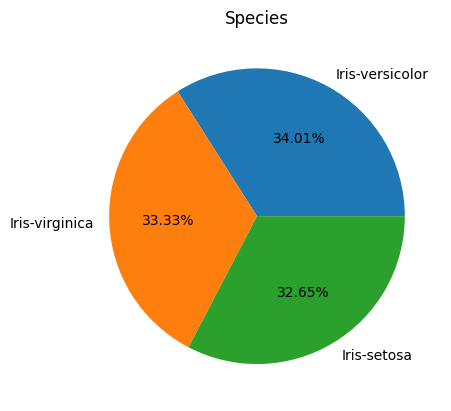

In [11]:
plt.pie(df.species.value_counts(), labels= df.species.value_counts().index,autopct="%1.2f%%")
plt.title("Species")
plt.show()

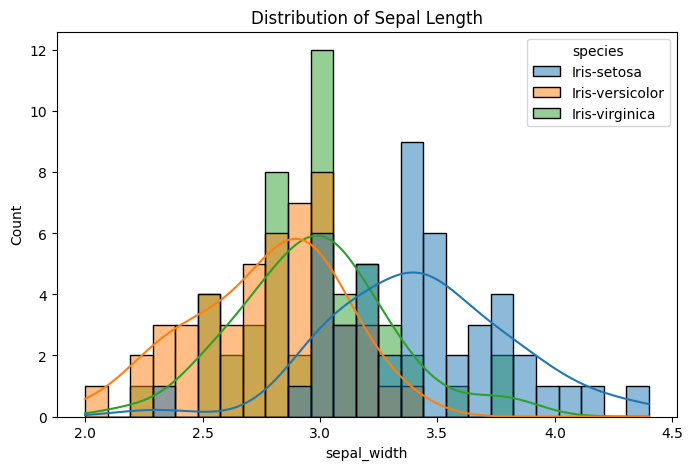

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sepal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Length")
plt.show()

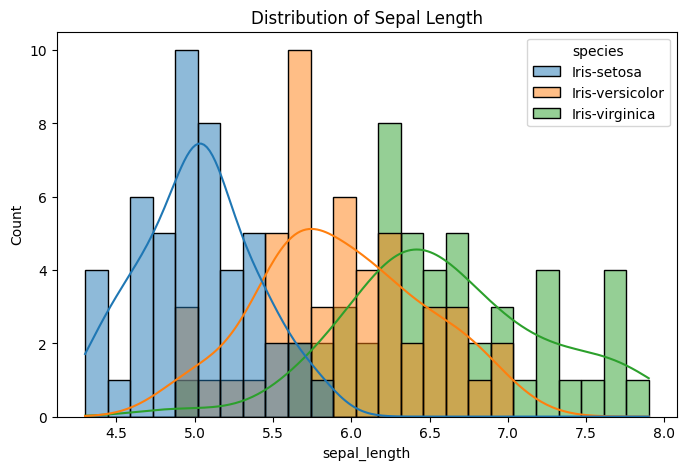

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sepal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Length")
plt.show()

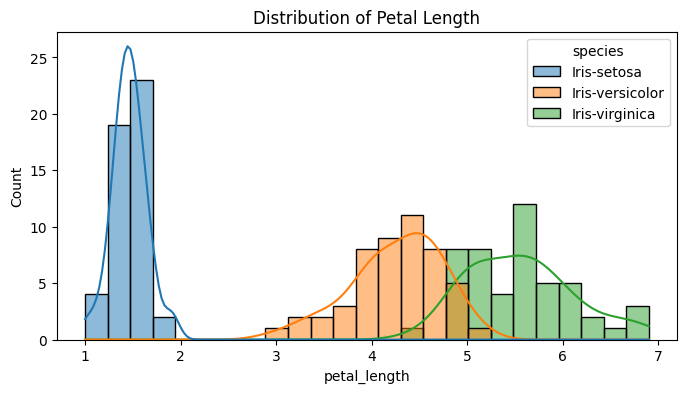

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='petal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Length")
plt.show()

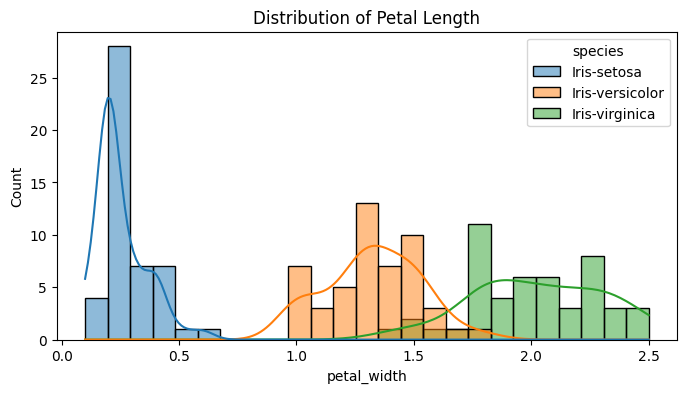

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='petal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Length")
plt.show()

In [16]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


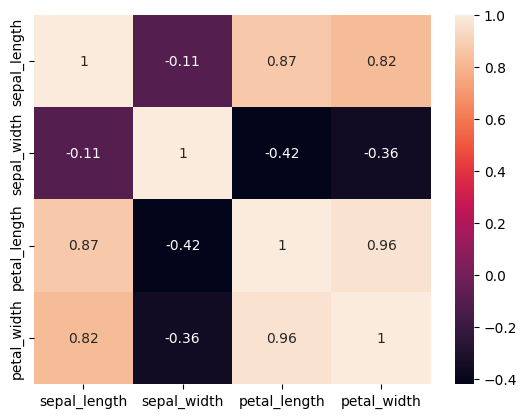

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

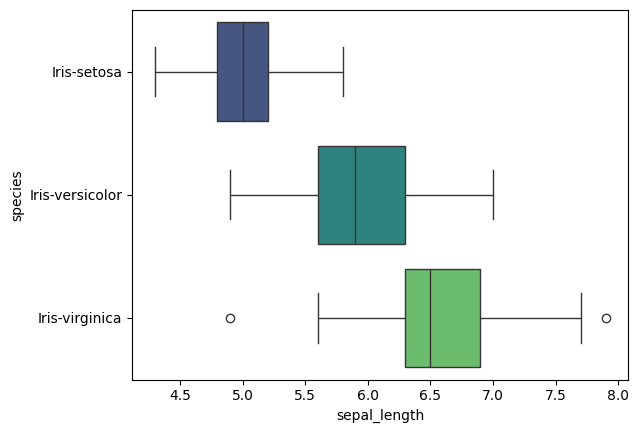

In [18]:
sns.boxplot(df , x = "sepal_length" , y = "species" , palette='viridis')
plt.show()

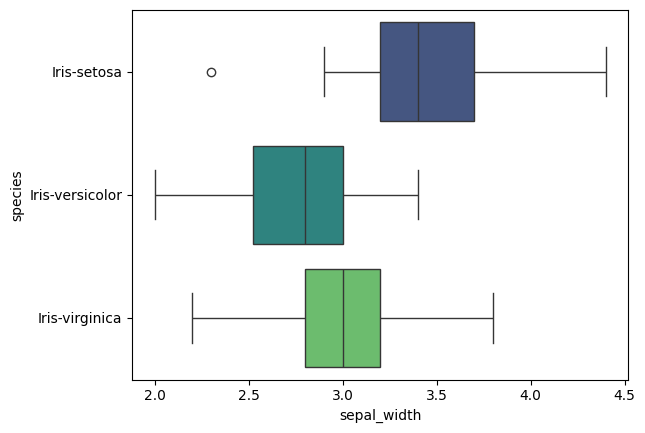

In [19]:
sns.boxplot(df , x = "sepal_width" , y = "species" , palette='viridis')
plt.show()

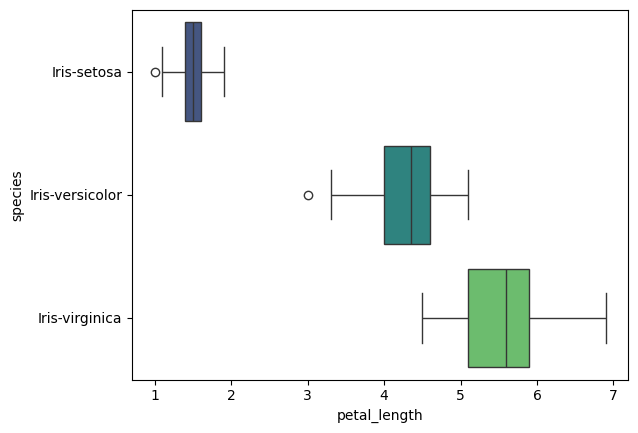

In [20]:
sns.boxplot(df , x = "petal_length" , y = "species" , palette='viridis')
plt.show()

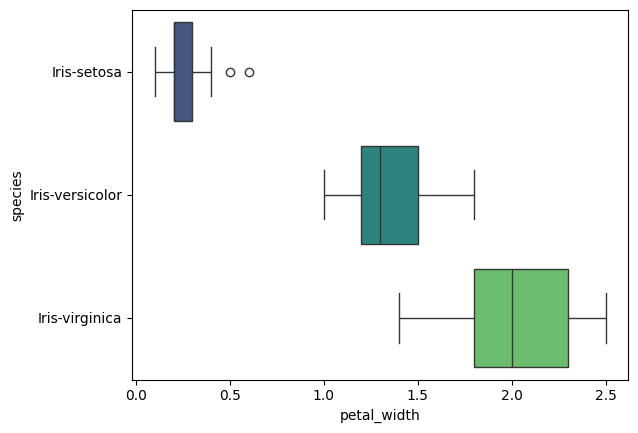

In [21]:
sns.boxplot(df , x = "petal_width" , y = "species" , palette='viridis')
plt.show()

### Label Encoding - change the catagorical values to numerical values.

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.species = lb.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Spilt the feature and target variable

In [23]:
x = df.drop('species', axis=1)
y = df.species

In [24]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

### Train-test split

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x,y , test_size=0.3 , random_state=2)

In [27]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
27,5.2,3.5,1.5,0.2
38,4.4,3.0,1.3,0.2
123,6.3,2.7,4.9,1.8
20,5.4,3.4,1.7,0.2
139,6.9,3.1,5.4,2.1


### Model training

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score is: ",acc*100)

Accuracy score is:  97.77777777777777


In [30]:
print('classification report for our model(Logistic Regression) is:\n',classification_report(y_pred , y_test))

classification report for our model(Logistic Regression) is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Random forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
print("Accuracy :",acc_rf*100,"%")

Accuracy : 97.77777777777777 %


### Decision Tree classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred_dc = dc.predict(x_test)
accuracy_dc = accuracy_score(y_pred_dc, y_test)
print("Accuracy score:",accuracy_dc*100)

Accuracy score: 95.55555555555556
